This initial part is a modified version of [EDA Tutorial](https://www.kaggle.com/roshankumarg/extensive-guide-to-exploratory-data-analysis/)(now removed) and with [Visualization and prediction with LSTM](https://www.kaggle.com/yashgoyal401/advanced-visualizations-and-predictions-with-lstm) which provide a EDA, some feature engeneering and an lstm model for the bikes count prediction


# Libraries


In [ ]:
import pandas as pd # Library for Dataframe operations
import numpy as np
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns   # Plotting library

#seaborn style
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True)

We load the dataset naming it bike.csv


In [ ]:
bike = pd.read_csv("bike.csv")
bike.head(3).append(bike.tail(3))

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


The dataset presents 10 columns:
- timestamp : when the event rent a bike occurred;
- cnt : number of bike rented;
- t1 : registered temperature in Celsius degree;
- t2 : felt temperature in Celsius degree;
- hum : percentage of humidity;
- wind_speed : wind speed in km/h;
- weather_code : category of the weather;
- is_holiday :  boolean field - 1 holiday / 0 non holiday;
- is_weekend :  boolean field - 1 weekend / 0 non weekend;
- season : season of the year; <br>
More in particular "weather_code" assume the following values
1 = clear; 2 = few clouds; 3 = broken clouds; 4 = cloudy; 7 = rain; 10 = storm; 26 = snowfall;

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


We can see that every feature has the same number of non-null values, so there is no preprocessing needed.


---
# FEATURE ENGINEERING 
Timestamp column is considerated as object type, we convert it in date_time in order to exract informations.

In [ ]:
bike['timestamp'] = pd.to_datetime(bike['timestamp'])

Now we can extract all the information from timestamp

In [ ]:
#we add hours, days, months as features
bike['hour'] = bike['timestamp'].dt.hour
bike['day_week'] = bike.timestamp.dt.dayofweek
bike['day_month'] = bike.timestamp.dt.day
bike['month'] = bike.timestamp.dt.month
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_week,day_month,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1




---
# Exploratory Data Analysis
Now we take a deeper look on the data



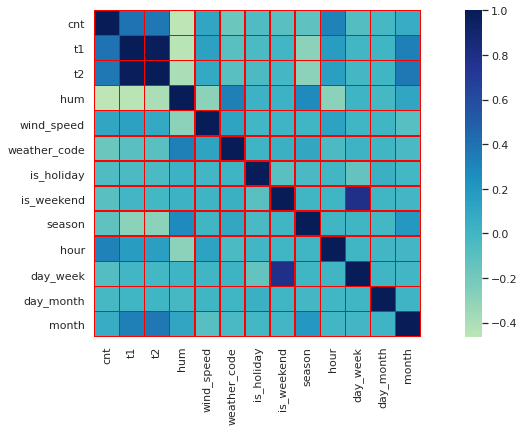

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(bike.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0,linecolor="red")

we can see the high correlation between the two temperatures, we will explore later how to treat it.

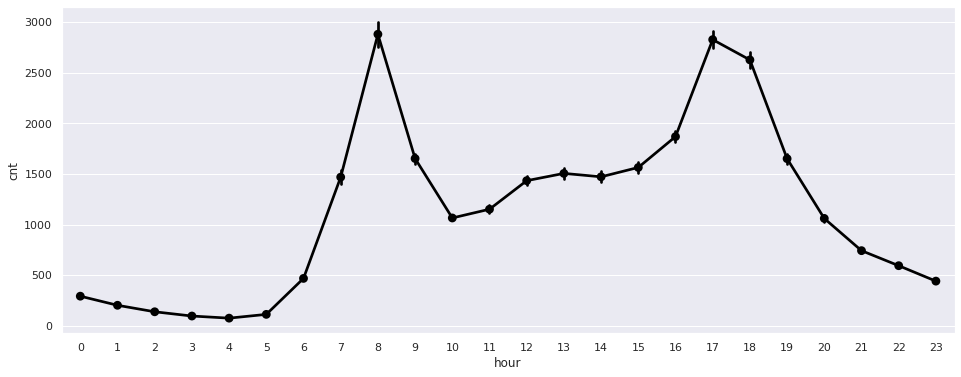

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=bike,x=bike.hour,y=bike.cnt,color="black")

The vast majority of shares is on the peak hours, probably because workers uses them to commute

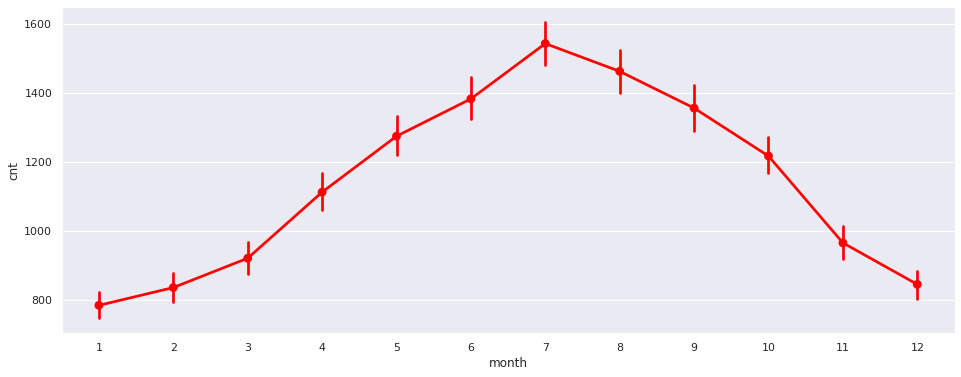

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=bike,x=bike.month,y=bike.cnt,color="red")

Spring and Summer are the season in which the sharing service is most used.

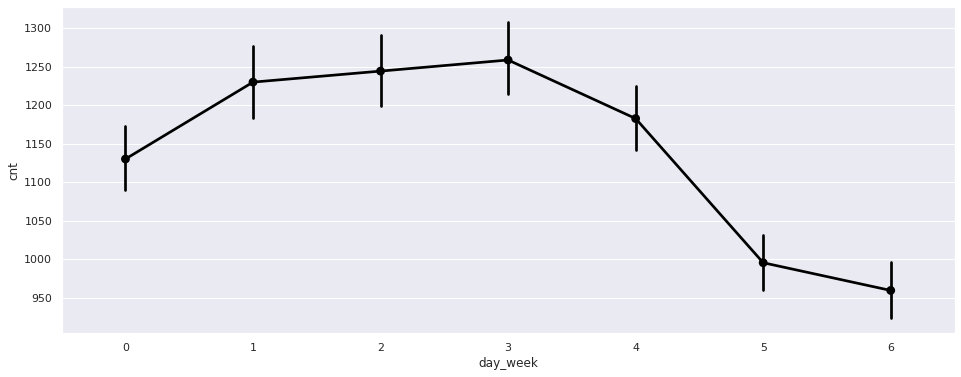

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=bike,x=bike.day_week,y=bike.cnt,color="black")

This one is another proof that a lot of people who uses bike sharing use it for going to work.

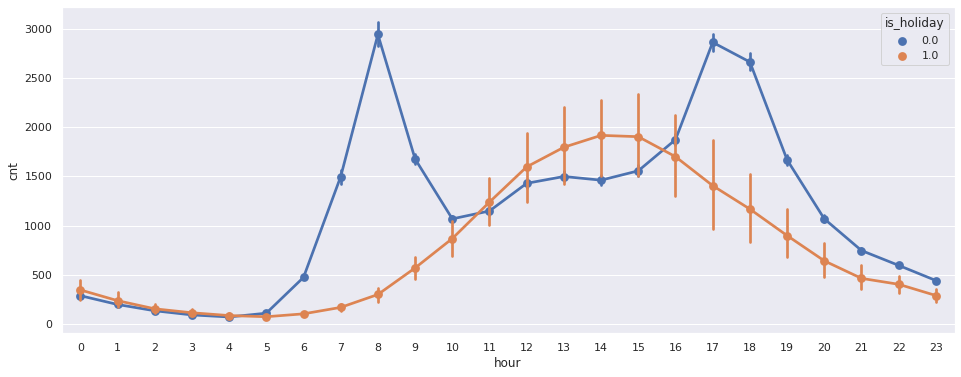

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=bike,x=bike.hour,y=bike.cnt,hue=bike.is_holiday)

Through this plot we can see that on holiday the bike are most used in the early afternoon otherwise the people seem to use the service to go to work and come back home.

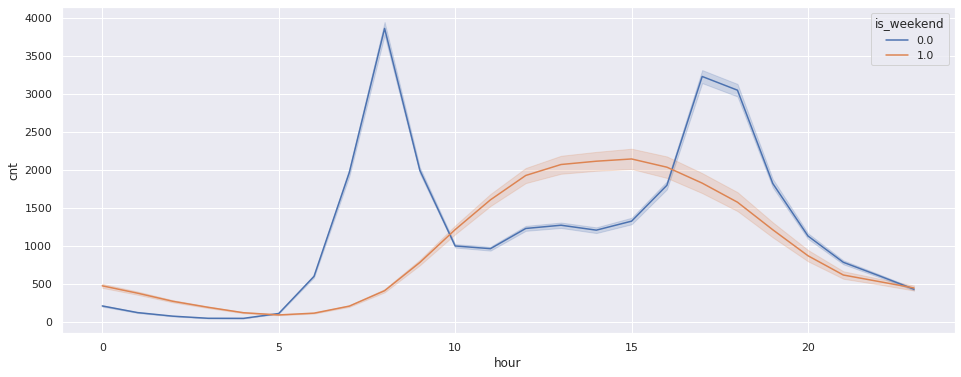

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x=bike.hour,y=bike.cnt,data=bike,hue=bike.is_weekend)

the behavior on weekend and holiday is really similar we would merge both together in our part of feature engeneering

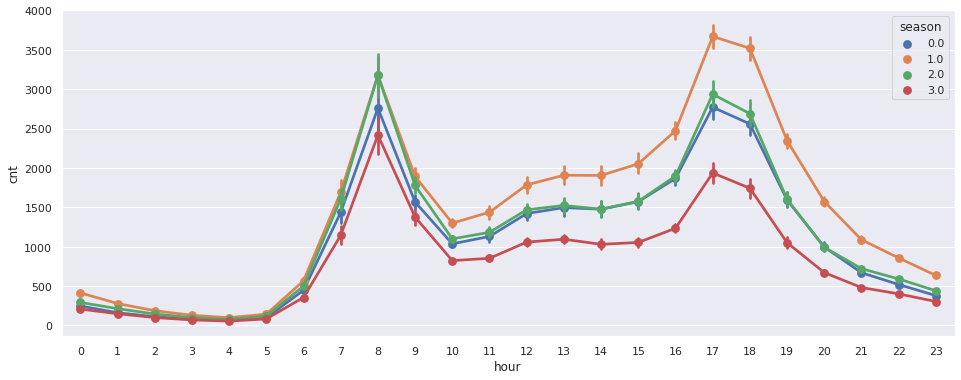

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x=bike.hour,y=bike.cnt,data=bike,hue=bike.season)

0-spring ; 1-summer; 2-fall; 3-winter.<br>
As expected the bikes count is higher in summer and is lower in winter.

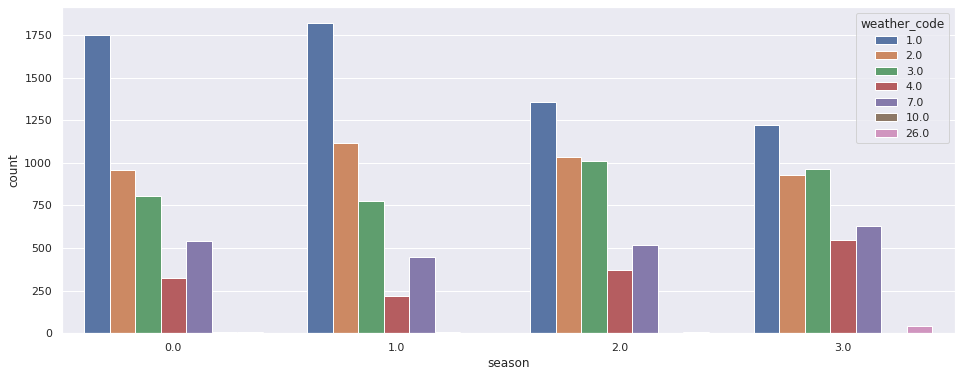

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=bike,hue=bike.weather_code,x=bike.season)

Behavior of the weather during each season.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

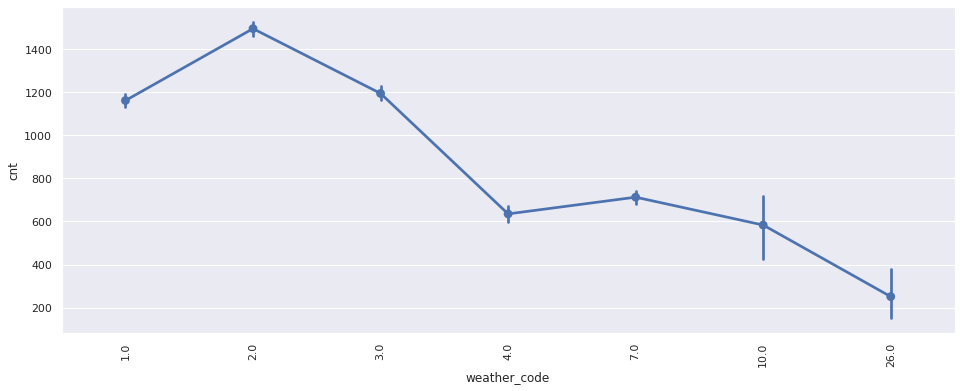

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=bike,x=bike.weather_code,y=bike.cnt)
plt.xticks(rotation=90)

Of course the choice of use a bike is affected by the weather.

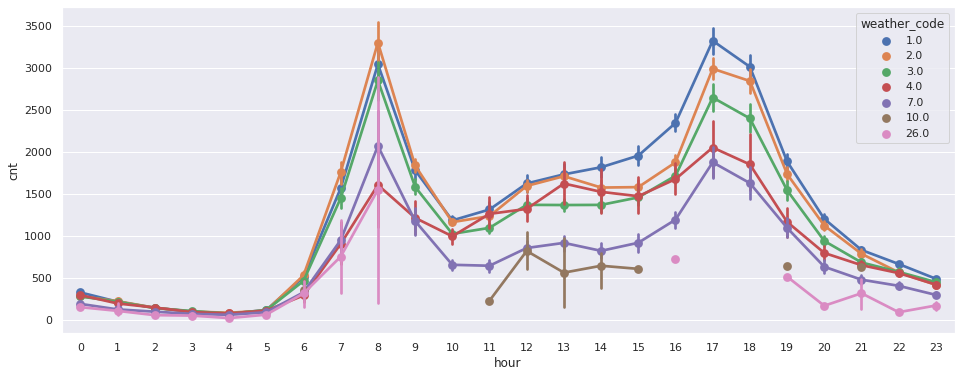

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x=bike.hour,y=bike.cnt,data=bike,hue=bike.weather_code)



---

# Preparing the data

In [ ]:
#Changing the types of the new features we added
bike['hour'] = bike['hour'].astype('category')
bike['day_week'] = bike['day_week'].astype('category')
bike['day_month'] = bike['day_month'].astype('category')
bike['month'] = bike['month'].astype('category')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  hour          17414 non-null  category      
 11  day_week      17414 non-null  category      
 12  day_month     17414 non-null  category      
 13  month         17414 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(8), int64(1)
memory usage: 1.4 MB


We can remove features that depens on other ones

In [ ]:
#We remove t2 since it is calculated based on t1, humidity and wind_speed
# Season and is_weekend can be computed by looking at the month and the day of the week
bike = bike.drop(columns=['is_weekend','t2', 'season'], axis=1)

We can change the value of weather code since some values are far from each others.

In [ ]:
#changing the values of weather code to have them consecutively

def convert(val):
  if val == 7.0:
    return 5.0
  if val == 10.0:
    return 6.0
  if val == 26.0:
    return 7.0
  return val


bike['weather_code'] = bike.apply(lambda row : convert(row['weather_code']), axis = 1)

bike['weather_code'].unique() #now we have value from 1 to 6 without missing values in this range

array([3., 1., 4., 5., 2., 7., 6.])

In [ ]:
bike.columns

Index(['timestamp', 'cnt', 't1', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'hour', 'day_week', 'day_month', 'month'],
      dtype='object')

SPLIT FOR RANDOM FOREST AND BOOSTING

In [ ]:
#splitting the data in train and tests


from sklearn.preprocessing import MinMaxScaler



from sklearn.model_selection import train_test_split
tmp_origin = bike.copy() #creating a temporal copy and then this will be scaled

scaler = MinMaxScaler()

#Create a list of numeric variables that range not in (0,1)
num_vars = ['t1','hum','wind_speed','cnt', 'weather_code', 'is_holiday', 'hour', 'day_week', 'day_month', 'month']

#Fit on data
tmp_origin[num_vars] = scaler.fit_transform(tmp_origin[num_vars])


tmp = tmp_origin.copy()
y = tmp.pop('timestamp')
y = tmp.pop('cnt')  #remove the cnt from the dataset
tmp = tmp_origin.copy()
tmp.pop('timestamp')
#with shuffle false with don't pick the test at random but in a sequential fashion
X_train0, X_test0, y_train0, y_test0 = train_test_split(tmp, y, test_size=0.25, shuffle=True)
print(X_train0)
print(y_train0)
print(bike)

            cnt        t1       hum  ...  day_week  day_month     month
1663   0.109288  0.239437  0.572327  ...  0.833333   0.433333  0.181818
3673   0.312850  0.521127  0.251572  ...  0.833333   0.166667  0.454545
8998   0.144402  0.154930  0.685535  ...  0.666667   0.466667  0.000000
1962   0.115903  0.309859  0.396226  ...  0.500000   0.833333  0.181818
13847  0.467939  0.760563  0.220126  ...  0.833333   0.166667  0.636364
...         ...       ...       ...  ...       ...        ...       ...
1368   0.003690  0.154930  0.761006  ...  0.000000   0.033333  0.181818
11319  0.153053  0.352113  0.647799  ...  0.666667   0.700000  0.272727
14120  0.009669  0.478873  0.849057  ...  0.500000   0.566667  0.636364
5778   0.275573  0.450704  0.710692  ...  0.333333   0.033333  0.727273
5913   0.025573  0.408451  0.710692  ...  0.166667   0.233333  0.727273

[13060 rows x 10 columns]
1663     0.109288
3673     0.312850
8998     0.144402
1962     0.115903
13847    0.467939
           ...   
1

# Models


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, max_features="auto")
regressor.fit(X_train0, y_train0)
y_pred = regressor.predict(X_test0)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test0, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test0, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test0, y_pred)))

Mean Absolute Error: 0.0001420212535869118
Mean Squared Error: 6.1399659744226755e-06
Root Mean Squared Error: 0.0024778954728605232


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

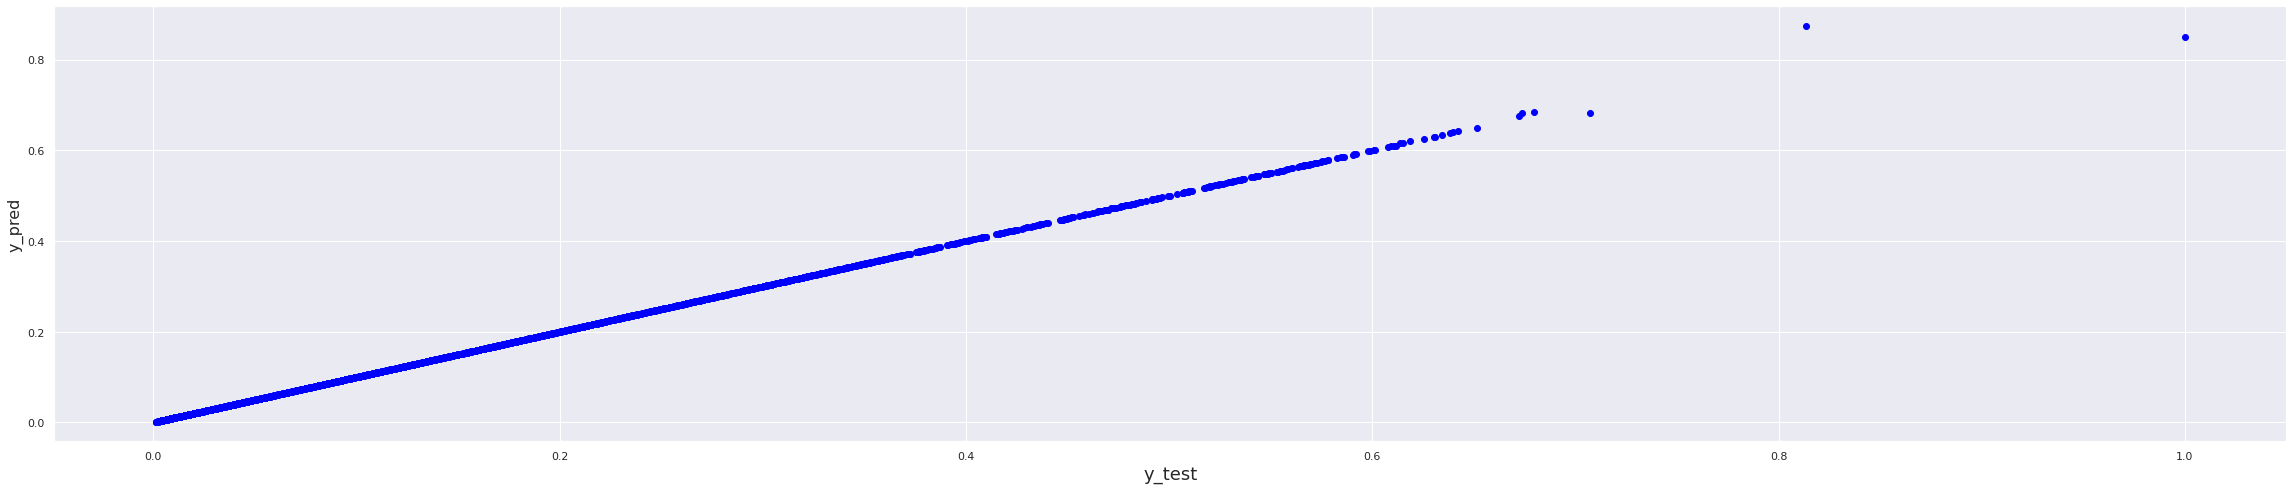

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(40,8))
plt.scatter(y_test0,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

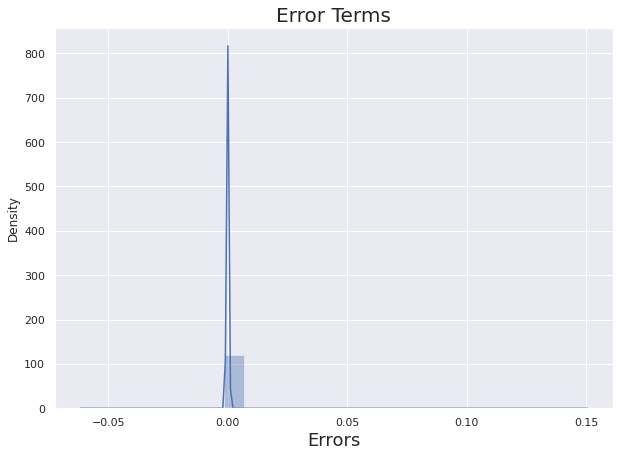

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(10,7))
sns.distplot((y_test0 - y_pred), bins = 25)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [ ]:
trees_nonamevar=[x for x in range(1,10)]  #it was 500 before
yyy=[]
for x in trees_nonamevar:
  regressor = RandomForestRegressor(n_estimators=x, max_features="auto")
  regressor.fit(X_train0, y_train0)
  y_pred = regressor.predict(X_test0)
  yyy.append(np.sqrt(metrics.mean_squared_error(y_test0, y_pred)))

df_tree=pd.DataFrame({"x_tree" : trees_nonamevar, "y_error" : yyy})

the minumim number of trees is  x_tree     0
y_error    5
dtype: int64


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 11 Text major ticklabel objects>)

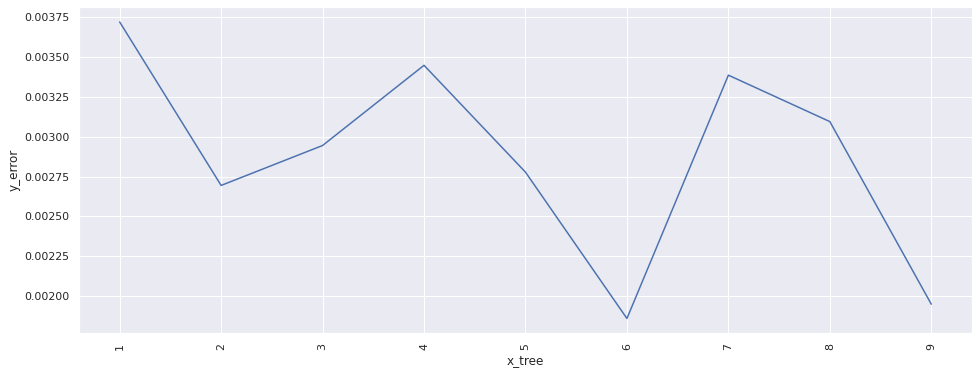

In [ ]:

'''fig = plt.figure()
plt.figure(figsize=(40,8))
plt.scatter(yyy,trees_nonamevar,color='blue')
fig.suptitle('n_estimators vs SME', fontsize=20)              # Plot heading 
                        
plt.ylabel('SME', fontsize=16) # X-label
plt.xlabel('n_estimators', fontsize=18)  '''
print("the minumim number of trees is ",df_tree.idxmin())
plt.figure(figsize=(16,6))
sns.lineplot(data=df_tree,x=df_tree.x_tree,y=df_tree.y_error)
plt.xticks(rotation=90)

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

Apart from the decision tree building method and loss function choice (we kept scikit learn defaults), the most important parameters are the number of estimators and the learning rate. To tune them we run the scikit learn gradient boosting regressor with different values and observed how the Root Mean Squared Error varied.

In [ ]:
n_estimators_GB = [x for x in range(10,100,10)] + [x for x in range(100,1000,100)] + [x for x in range(1000,10000,1000)]
rmse_GB=[]
for x in n_estimators_GB:
  regressor = GradientBoostingRegressor(n_estimators=x, learning_rate=0.1, loss='ls').fit(X_train0, y_train0)
  y_pred = regressor.predict(X_test0)
  rmse_GB.append(np.sqrt(metrics.mean_squared_error(y_test0, y_pred)))

df_n_estimators_GB=pd.DataFrame({"nb_estimators" : n_estimators_GB, "RMSE" : rmse_GB})

The following plot shows that the optimal number of estimators should be around 1000. These computations were done with a learning rate of 0.1

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 <a list of 8 Text major ticklabel objects>)

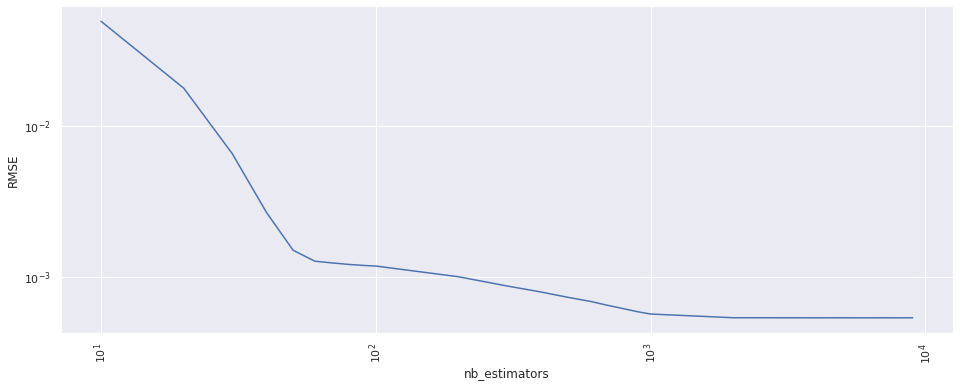

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_n_estimators_GB,x=df_n_estimators_GB.nb_estimators,y=df_n_estimators_GB.RMSE)
plt.yscale('log')
plt.xscale('log')
plt.xticks(rotation=90)

We chose 1000 for the number of estimators and computed the RMSE for learning rates varying from 0.0001 to 0.9

(array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
        1.e+02]), <a list of 9 Text major ticklabel objects>)

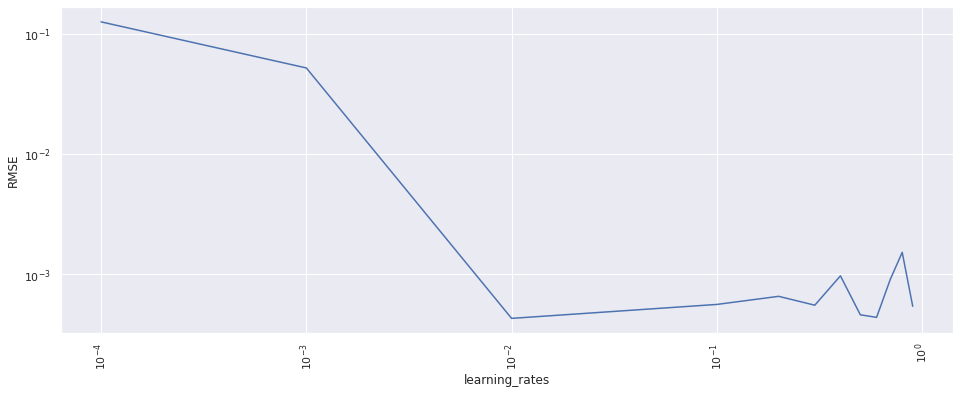

In [ ]:
# learning_rates =[x/10000 for x in range(1,101,10)]+[x/1000 for x in range(1,101,10)]+[x/10 for x in range(1,10)]
learning_rates = [0.0001, 0.001, 0.01, 0.1]+[x/10 for x in range(1,10)]
rmse_GB=[]
for x in learning_rates:
  regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=x, loss='ls').fit(X_train0, y_train0)
  y_pred = regressor.predict(X_test0)
  rmse_GB.append(np.sqrt(metrics.mean_squared_error(y_test0, y_pred)))

df_learning_rates_GB=pd.DataFrame({"learning_rates" : learning_rates, "RMSE" : rmse_GB})

plt.figure(figsize=(16,6))
sns.lineplot(data=df_learning_rates_GB,x=df_learning_rates_GB.learning_rates,y=df_learning_rates_GB.RMSE)
plt.yscale('log')
plt.xscale('log')
plt.xticks(rotation=90)

In [ ]:
regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, loss='ls').fit(X_train0, y_train0)
y_pred = regressor.predict(X_test0)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test0, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test0, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test0, y_pred)))

Mean Absolute Error: 0.00019791589755944943
Mean Squared Error: 1.8944454207094226e-07
Root Mean Squared Error: 0.0004352522740560263


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

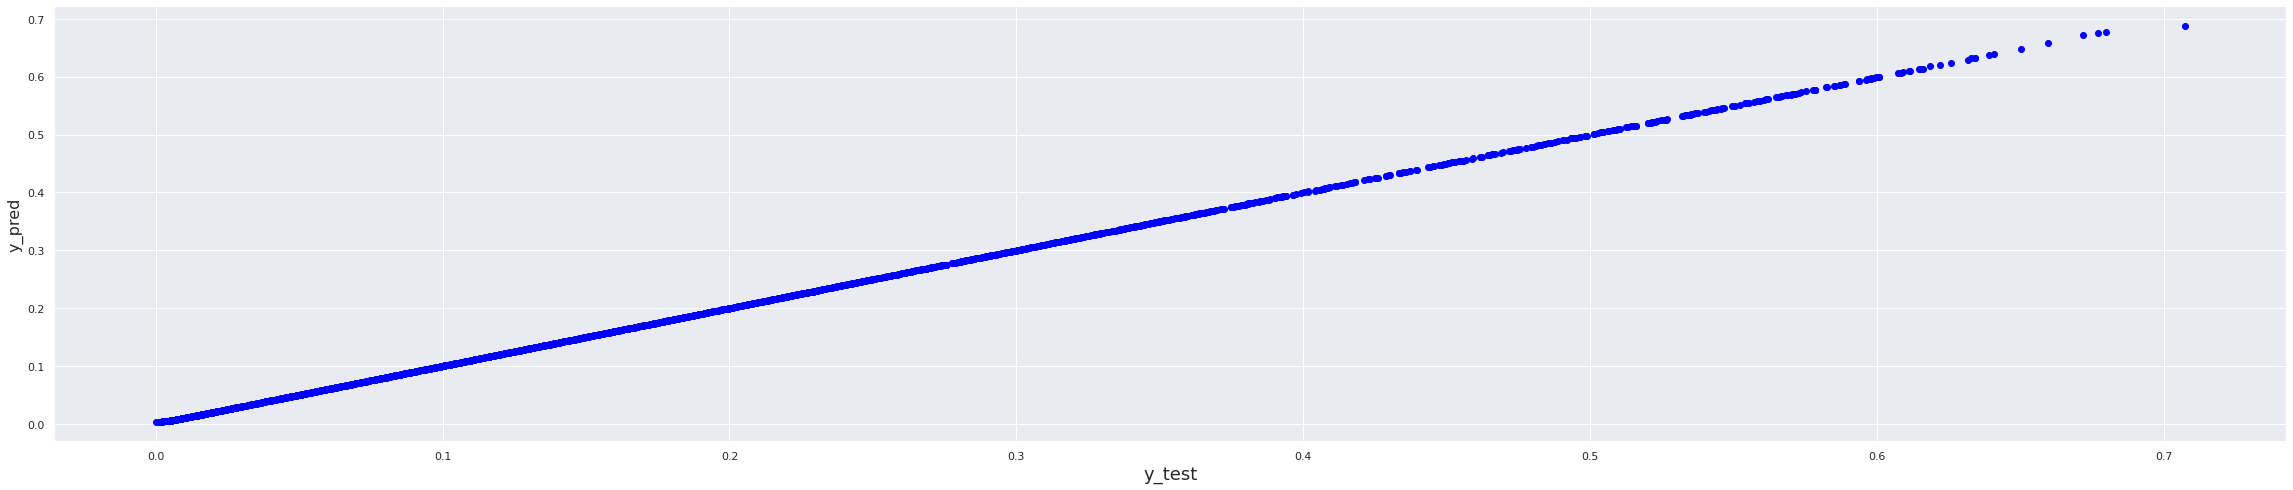

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(40,8))
plt.scatter(y_test0,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

# Data preparation for Linear Regression & KNN

## Libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

## Step 1 : Data Preparation
Just for linear regression, I decide to consider <b>dummy variables</b> for weather_code, month, day_week, day_month and hour.
### What is a Dummy Variable?
A dummy variable is a numeric variable that represents categorical data; they can take on only two quantitative values,1 or 0. Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.
### Why Dummy Variable?
As a practical matter, regression results are easiest to interpret when dummy variables are limited to two specific values.

In order to reduce the amount of dummy variables we decide delete the column 'day_month' and to group the hours and the weather code: <br>
- Using 'morning' from 6  to 12; 'afternoon' from 13 to 20 and 'night' otherwise
- Using 'clear for weather code 1; 'cloudy' for weather code 2 and 3 and bad weather for code equal or greater than 4


In [ ]:
def combining_hours(row):
  h = row
  new_h = 0
  if h > 5 and h < 13:
    #morning
    new_h = 1
  elif h >= 13 and h < 21:
    #afternoon
    new_h = 2 
  return new_h


def combining_weather(row):
  w = row 
  new_w = 0
  if w > 2 and w <= 3:
    #cloudy
    new_w = 1
  elif w >= 4:
    #bad weather
    new_w = 2
  return new_w  
  

bike = bike.drop(columns=['day_month']) #deleting day month

bike['hour'] = bike.apply(lambda row : combining_hours(row['hour']), axis = 1)
bike['weather_code'] = bike.apply(lambda row : combining_weather(row['weather_code']), axis = 1)
bike.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,hour,day_week,month
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,1,0.0,0,6,1
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,0,0.0,0,6,1
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,0,0.0,0,6,1
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,0,0.0,0,6,1
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,0,0.0,0,6,1


In [ ]:
#Mapping variables hour, month, weather_code, day_week to let the dataset more readable
bike['hour'] = bike.hour.map({0:'night',1:'morning',2:'afternoon'})
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['day_week']=bike.day_week.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike['weather_code']=bike.weather_code.map({0: 'Clear',1:'Cloudy', 2: 'Bad weather'})

In [ ]:
bike.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,hour,day_week,month
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,Cloudy,0.0,night,Sat,Jan
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,Clear,0.0,night,Sat,Jan
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,Clear,0.0,night,Sat,Jan
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,Clear,0.0,night,Sat,Jan
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,Clear,0.0,night,Sat,Jan


In [ ]:
#Get the dummy variables for month,day_week, day_month and hour.
months = pd.get_dummies(bike.month)
day_weeks = pd.get_dummies(bike.day_week)
hours = pd.get_dummies(bike.hour)
weather_codes = pd.get_dummies(bike.weather_code)

In [ ]:
# Add the results to the original bike dataframe
bike=pd.concat([bike,months,day_weeks,hours, weather_codes],axis=1)
bike.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,hour,day_week,month,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,afternoon,morning,night,Bad weather,Clear,Cloudy
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,Cloudy,0.0,night,Sat,Jan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,Clear,0.0,night,Sat,Jan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,Clear,0.0,night,Sat,Jan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,Clear,0.0,night,Sat,Jan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,Clear,0.0,night,Sat,Jan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
# Drop month,day_week, day_month and hour as we have created the dummies for it
bike.drop(['month','day_week','hour','weather_code'], axis = 1, inplace = True)
bike.head()

,timestamp,cnt,t1,hum,wind_speed,is_holiday,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,afternoon,morning,night,Bad weather,Clear,Cloudy
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
#Aso timestamp is no needed
bike.drop(['timestamp'], axis = 1, inplace = True)

Now it's time to remove <b> outliers </b> since they increase the variability in data and decrease statistical power of our model. Consequently, excluding outliers our results can become statistically significant. <br>
Our idea is to map the labels that exceed the 99th quantile into more regular point. 

In [ ]:
q_hi = bike['cnt'].quantile(0.99)
bike["cnt"] = bike["cnt"].map(lambda i: i/(np.random.rand() + 1 ) if i >= q_hi else i) #Mapping in the previous value divided by a random quantity
                                                                                       # in order to get a smaller value

## Step 2: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables that range not in (0,1)
num_vars=['t1','hum','wind_speed','cnt']

#Fit on data
bike[num_vars] = scaler.fit_transform(bike[num_vars])


bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = None)


## Step 3 :  Features Rescaling

It is important to have all the variables on the same scale for the model to be easily interpretable. I decide to use the Max-Min scaling that normalizes the feature between 0 and 1.

In [ ]:
"""
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables that range not in (0,1)
num_vars=['t1','hum','wind_speed','cnt']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()
"""

"\n#Instantiate an object\nscaler = MinMaxScaler()\n\n#Create a list of numeric variables that range not in (0,1)\nnum_vars=['t1','hum','wind_speed','cnt']\n\n#Fit on data\nbike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])\nbike_train.head()\n"

### Dividing into X and Y sets for the model building

In [ ]:
#Divide the data into X and y and in test split
y_train = bike_train.pop('cnt')
X_train = bike_train

#y_test = bike_test.pop('cnt')
#X_test = bike_test


# KNN


In [ ]:
#this is a copy of the data to use for the KNN
KNN_y = y_train.copy()
KNN_x = X_train.copy()

tmp = bike_test.copy()
"""
#scaling the train data also
num_vars=['t1','hum','wind_speed','cnt']

tmp[num_vars] = scaler.fit_transform(tmp[num_vars])
"""

KNN_y_test = tmp.pop('cnt')
KNN_x_test = tmp


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(KNN_x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12189 entries, 15387 to 14479
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   t1           12189 non-null  float64
 1   hum          12189 non-null  float64
 2   wind_speed   12189 non-null  float64
 3   is_holiday   12189 non-null  float64
 4   Jan          12189 non-null  uint8  
 5   Feb          12189 non-null  uint8  
 6   Mar          12189 non-null  uint8  
 7   Apr          12189 non-null  uint8  
 8   May          12189 non-null  uint8  
 9   June         12189 non-null  uint8  
 10  July         12189 non-null  uint8  
 11  Aug          12189 non-null  uint8  
 12  Sep          12189 non-null  uint8  
 13  Oct          12189 non-null  uint8  
 14  Nov          12189 non-null  uint8  
 15  Dec          12189 non-null  uint8  
 16  Sun          12189 non-null  uint8  
 17  Mon          12189 non-null  uint8  
 18  Tue          12189 non-null  uint8  
 19  

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors.ball_tree import BallTree

def MyDist(x,y):
  dist = 0
  #if they are similar the flag is 0 otherwise 1
  flag_month = 1
  flag_day = 1
  flah_h  = 1
  flag_w = 1
  #print(x,y)
  for i in range(28):
    if i < 3:
      dist += np.sqrt(np.square(x[i] - y[i]))
    elif i >= 3 and i <= 15:
      if x[i] == y[i]:
        flag_month = 0
    elif i > 15 and i <= 22:
      if x[i] == y[i]:
        flag_day = 0
    elif i > 22 and i <=25:
      if x[i] == y[i]:
        flah_h = 0
    elif i > 25:
      if x[i] == y[i]:
        flag_w = 0
  dist += ( flag_month + flag_day + flah_h + flag_w )
  return dist



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


k = 1
best_r2_score = 100 #really a high error to initialize




""" WITH THIS TEST I VERIFIED THE BEST COOSE FOR K
for i in range (25):
  neigh = KNeighborsRegressor(n_neighbors=i+1)
  neigh.fit(KNN_x, KNN_y)
  predicted = neigh.predict(KNN_x_test)
  tmp_score = r2_score(KNN_y_test,predicted)
  print("error with k = ",i+1, " ",tmp_score)
  if tmp_score < best_r2_score:
    best_r2_score = tmp_score
    k = i
"""

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(KNN_x, KNN_y)
print("fit done")

predicted = neigh.predict(KNN_x_test)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(KNN_y_test, predicted)))

fit done
Root Mean Squared Error: 0.14246910569565224


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

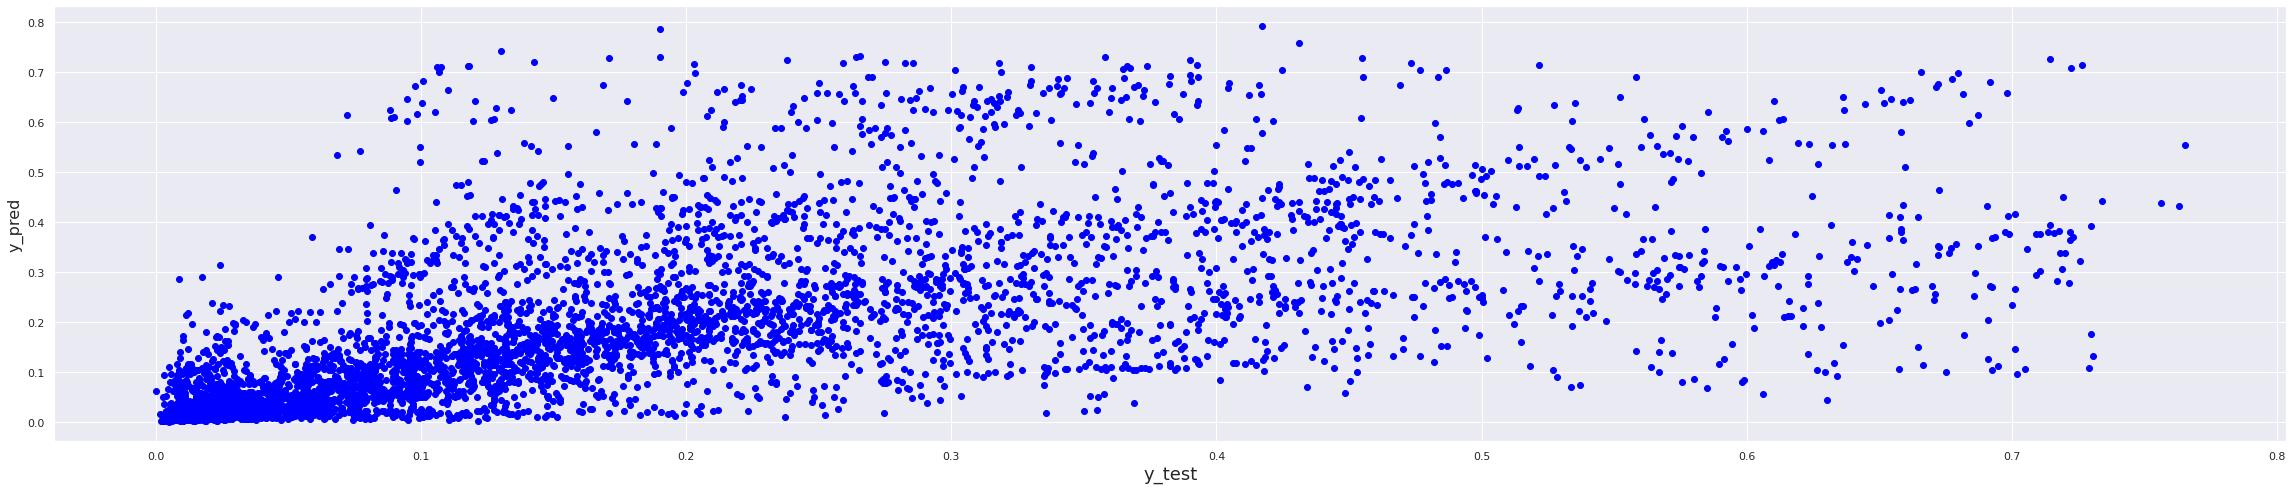

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(40,8))
plt.scatter(KNN_y_test,predicted,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

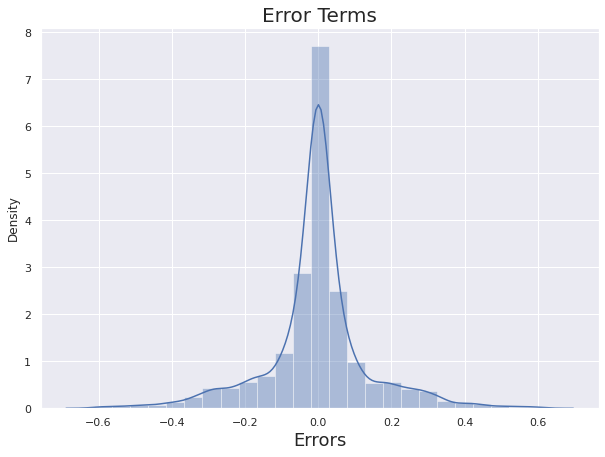

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(10,7))
sns.distplot((KNN_y_test - predicted), bins = 25)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

# LINEAR REGRESSION


In [ ]:
t1 = X_train.copy()
t2 = bike_test.copy()

In [ ]:
from sklearn.feature_selection import RFE
"""   tryin different feautre eleminition to improve linear regression
for i in range(1,28,1):

  lm = LinearRegression()
  lm.fit(X_train, y_train)

  rfe = RFE(lm, i)
  rfe = rfe.fit(X_train, y_train)
  #end original cell
  col = X_train.columns[rfe.support_]
  X_train = X_train[col]
  lm.fit(X_train, y_train) 

  y_test = bike_test.pop('cnt')
  X_test = bike_test[col]   #the col are from RFE
  y_pred = lm.predict(X_test)
  print("features",i,'Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
  X_train = t1.copy()
  bike_test = t2.copy()

"""
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)#not removing nothing, we are selecting all features since this is the best result
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train = X_train[col]
lm.fit(X_train, y_train)  #fitting again with less features

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 4: Residual Analysis of the train data
Now I check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
#y train predicted
y_train_pred = lm.predict(X_train)      

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

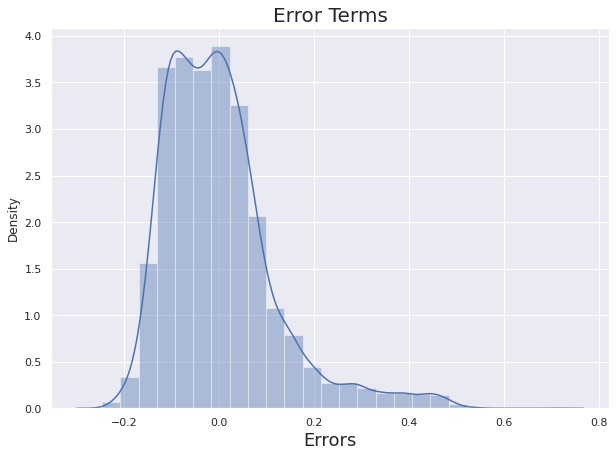

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(10,7))
sns.distplot((y_train - y_train_pred), bins = 25)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see that error terms are normally distributed


## Step 5 : Making Predictions


### Dividing into X_test and y_test

In [ ]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test[col]   #the col are from RFE
X_test.head(3)

,t1,hum,wind_speed,is_holiday,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,afternoon,morning,night,Bad weather,Clear,Cloudy
5276,0.605634,0.496855,0.442478,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2507,0.366197,0.377358,0.460177,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
10143,0.239437,0.698113,0.247788,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


## Step 6: Model Evaluation

In [ ]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

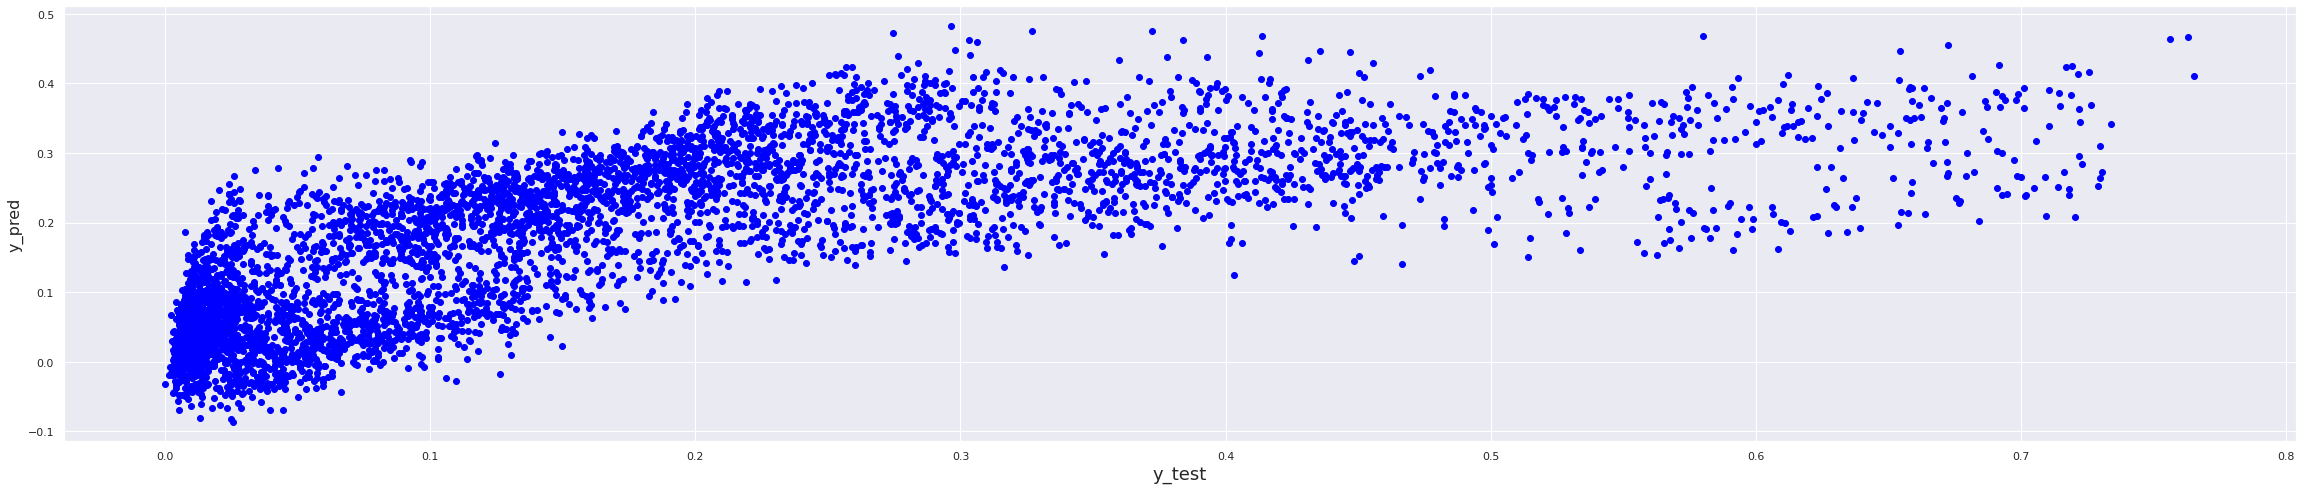

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(40,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)         

### Root Mean Square Error
RMSE is the standard deviation of the residuals where residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.


In [ ]:
#Evaluate RMSE for test
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.11540940713629684
